In [187]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [188]:
woman = pd.read_excel('Womens Clothing Reviews Data.xlsx')
woman.tail(3)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!",3,1
23485,1104,General Petite,Dresses,Dresses,Chennai,Mobile,52,Please make more like this one!,"This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!",5,1


In [189]:
woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [190]:
for column in ["Category","Subcategory1","SubCategory2","Review Text"]:
    woman = woman[woman[column].notnull()]
woman.drop(woman.columns[0], inplace=True, axis=1)

In [191]:
woman.shape

(22628, 10)

In [192]:
woman['Label'] = 0

In [193]:
woman.loc[woman.Rating >= 3, ['Label']] = 1

In [194]:
woman['Word Count'] = woman['Review Text'].str.split().apply(len)

In [195]:
woman.sample(5)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Label,Word Count
17004,General,Tops,Sweaters,Mumbai,Web,53,Just ok cowl sweater,"Gorgeous color and fit, but fabric is not great. i ordered this to wear with leggings and booties. i returned as i could tell it would get baggy in the elbows and rear end. just not a good fabric. bummer!!!!",3,0,1,40
8840,General,Dresses,Dresses,Gurgaon,Web,36,"Day/evening, every season, no snag tulling!","I don't even know where to begin--this is a dress for all seasons, but especially the holiday season! i bought it specifically for the guise of a holiday part, i can't tell you what a (black) velvet blazer and (black) patent leather heels did for it! the amazing part is that i wore it to work with a cardigan and booties with no problem. my coworkers were amazed but its transition. i have a slim velvet belt with a antique-ish looking clasp that i wore all day with it, too, and that was the ch...",5,1,1,95
7117,General,Tops,Sweaters,Gurgaon,Web,44,Very itchy!,"A beautiful sweater and very flattering on. the stock photos do not do it justice. but, i had to give it only 2 stars because it was so itchy that i couldn't even keep it on in the dressing room for more than a minute.",2,0,0,45
1900,General Petite,Bottoms,Pants,Gurgaon,Web,56,The perfect pant for warmer weather,"Finding pants off the rack that fit me is always a challenge - i'm petite (5' 1'), a bit curvy and short-waisted, so many of today's low-rise styles just do not work for me. however, these pants are a better cut and come pretty close to a perfect fit - comfortable and flattering, too. i've actually had pretty good luck with pilcro pants. i always have some gapping in the waist, but it's not much of an issue with these. more than likely whatever top i wear will hide that part. i was advised b...",5,1,1,96
18213,General,Bottoms,Shorts,Bangalore,Web,33,This is my new summer go to!,"This jumper is so cute, it is soft, and you can dress it up or down depending on where your going.",5,1,1,21


In [196]:
woman.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Customer Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommend Flag,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0
Word Count,60.281333,28.592443,2.0,36.0,59.0,89.0,115.0


In [197]:
woman[['Review Title', 'Category', 'Subcategory1', 'SubCategory2']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
Review Title,13983,Love it!,136
Category,3,General,13365
Subcategory1,6,Tops,10048
SubCategory2,20,Dresses,6145


Text(0.5, 1.0, 'Age Distribution ')

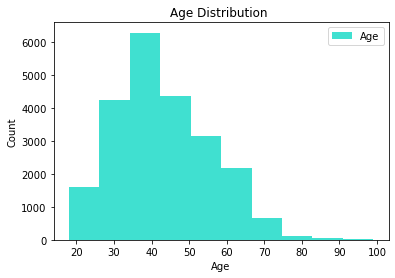

In [198]:
plt.hist(woman['Customer Age'], color="turquoise", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution ")

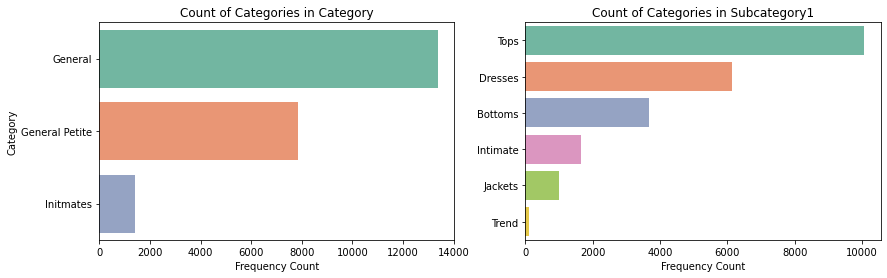

In [199]:
Divdep = ['Category','Subcategory1']
f, axes = plt.subplots(1, len(Divdep), figsize=(14, 4), sharex=False)

for i, x in enumerate(Divdep):
    sns.countplot(y=x, data=woman, order=woman[x].value_counts().index, ax=axes[i], color="turquoise", palette="Set2")
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

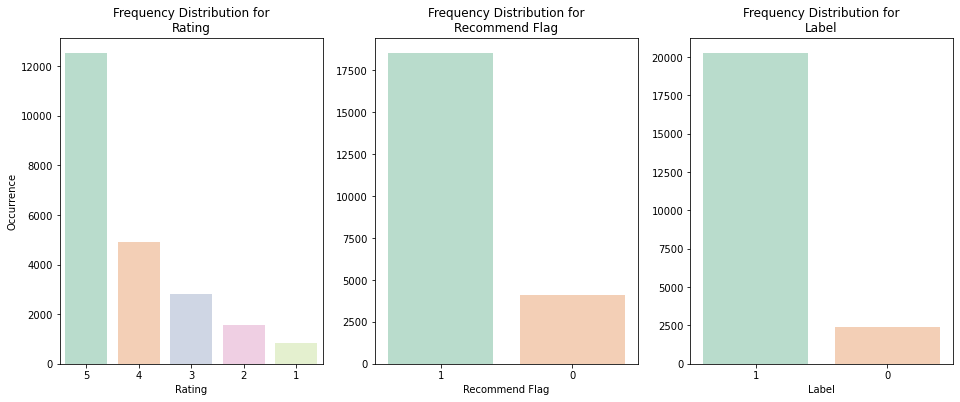

In [200]:
Categorical_dtypes = ['Rating', 'Recommend Flag', 'Label']
increment = 0
f, axes = plt.subplots(1, len(Categorical_dtypes), figsize=(16, 6), sharex=False)

for i in range(len(Categorical_dtypes)):
    sns.countplot(x=Categorical_dtypes[increment], data=woman, order=woman[Categorical_dtypes[increment]].value_counts().index, ax=axes[i], color="turquoise", palette="Pastel2")
    axes[i].set_title('Frequency Distribution for\n{}'.format(Categorical_dtypes[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(Categorical_dtypes[increment]))
    increment += 1
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.savefig('freqdist-rating-recommended-label.png', format='png', dpi=300)
plt.show()

In [201]:
pd.set_option('max_colwidth', 500)
woman[["Review Title","Review Text", "Rating"]].sample(2)

,Review Title,Review Text,Rating
11989,Gorgeous,"I can't believe these aren't sold out yet. i had no problem getting this over my head. this top has such beautiful colors and embroidery. quality is good. flattering on. at this price, it is probably the best deal i've gotten on anything from retailer. i would recommend this top, absolutely!",5
164,So pretty!,"I bought this and like other reviews, agree that the quality probably could be better, but i still love it enough to keep. the buckle fell apart, but i was able to fix it and the zipper seems a little weak. it has pilled, but the fabric is textured, so i didn't even notice until i read the other reviews and then looked back at my jacket. it is a perfect medium coat for 40's & 50's before i am ready to bust out my ugly down north face for winter. i get compliments every time i wear it! love!!",4


In [202]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

In [204]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [205]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
woman['Review Text']= woman['Review Text'].astype(str)

# Applying Model, Variable Creation
woman['Polarity Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
woman['Neutral Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
woman['Negative Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
woman['Positive Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
woman['Sentiment'] = ''
woman.loc[woman['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
woman.loc[woman['Polarity Score'] == 0, 'Sentiment'] = 'Neutral'
woman.loc[woman['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

In [206]:
def percentstandardize_barplot(x, y, hue, data, ax=None, order=None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x=x, y=y, hue=hue, ax=ax, order=order, color="turquoise",
                data=(data[[x, hue]]
                      .reset_index(drop=True)
                      .groupby([x])[hue]
                      .value_counts(normalize=True)
                      .rename('Percentage').mul(100)
                      .reset_index()
                      .sort_values(hue)))
    plt.title('Percentage Frequency of {} by {}'.format(hue, x))
    plt.ylabel('Percentage %')

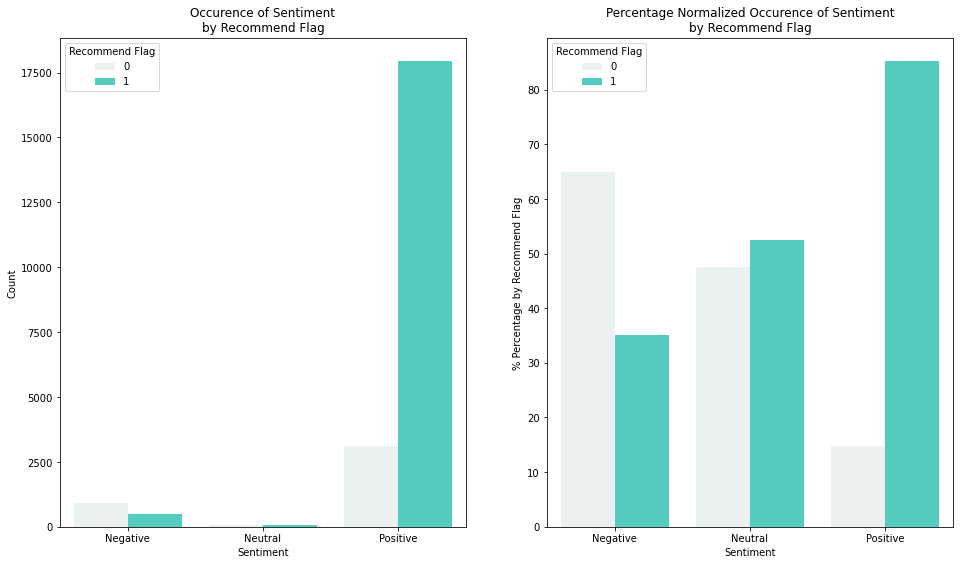

In [207]:
huevar = 'Recommend Flag'
xvar = 'Sentiment'
f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=xvar, hue=huevar,data=woman, ax=axes[0], order=['Negative', 'Neutral', 'Positive'], color="turquoise")
axes[0].set_title('Occurence of {}\nby {}'.format(xvar, huevar))
axes[0].set_ylabel('Count')
percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=woman, ax=axes[1], )
axes[1].set_title('Percentage Normalized Occurence of {}\nby {}'.format(xvar, huevar))
axes[1].set_ylabel('% Percentage by {}'.format(huevar))
plt.savefig('norm-sentimentdist.png', format='png', dpi=300)
plt.show()

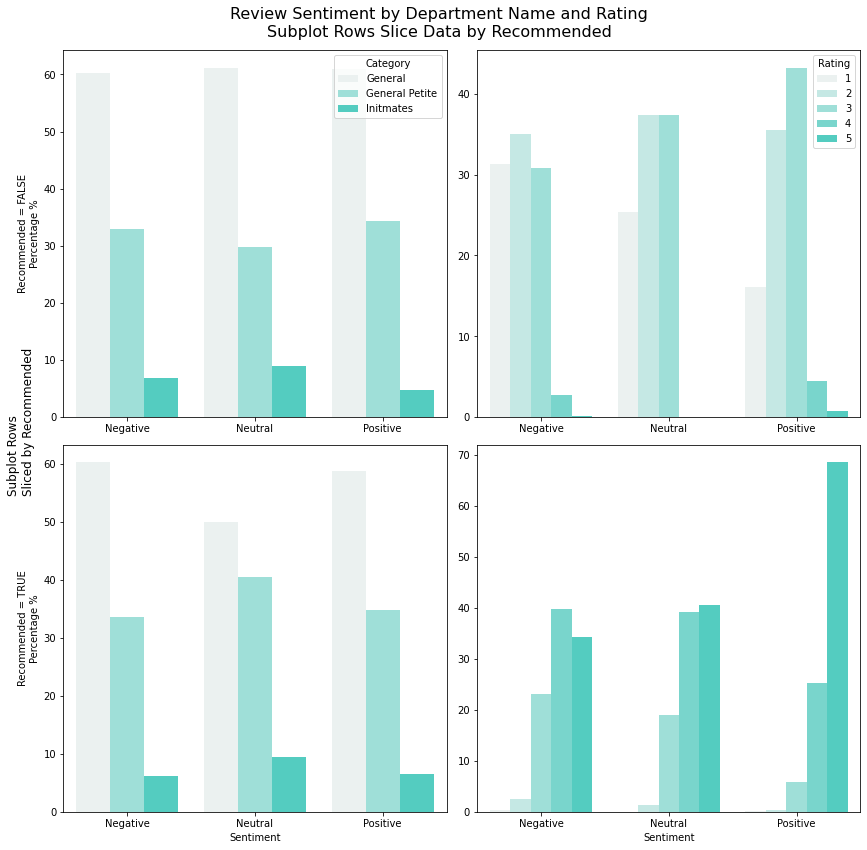

In [208]:
xvar = 'Sentiment'
huevar = 'Category'
rowvar = 'Recommend Flag'

# Plot
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
for i,x in enumerate(set(woman[rowvar][woman[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=woman[woman[rowvar] == x],
                               ax=axes[i,0], order=['Negative','Neutral','Positive'])
    percentstandardize_barplot(x=xvar, y='Percentage', hue='Rating', data=woman[woman[rowvar] == x],
                               ax=axes[i,1], order=['Negative','Neutral','Positive'])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,0].set_ylabel('Recommended = FALSE\nPercentage %')
axes[1,0].set_ylabel('Recommended = TRUE\nPercentage %')
axes[1,1].set_title('')

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle('Review Sentiment by Department Name and Rating\nSubplot Rows Slice Data by Recommended', fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.savefig('sentiment-deptname-rating-recommended.png', format='png', dpi=300)
plt.show()

In [209]:
woman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        22628 non-null  object 
 1   Subcategory1    22628 non-null  object 
 2   SubCategory2    22628 non-null  object 
 3   Location        22628 non-null  object 
 4   Channel         22628 non-null  object 
 5   Customer Age    22628 non-null  int64  
 6   Review Title    19662 non-null  object 
 7   Review Text     22628 non-null  object 
 8   Rating          22628 non-null  int64  
 9   Recommend Flag  22628 non-null  int64  
 10  Label           22628 non-null  int64  
 11  Word Count      22628 non-null  int64  
 12  Polarity Score  22628 non-null  float64
 13  Neutral Score   22628 non-null  float64
 14  Negative Score  22628 non-null  float64
 15  Positive Score  22628 non-null  float64
 16  Sentiment       22628 non-null  object 
dtypes: float64(4), int64(5), object

In [210]:

woman['Rating'] = [1 if rating > 3 else 0 for rating in woman['Rating']]
woman = woman[['Review Text', 'Rating']]
woman.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(woman[['Review Text']], woman['Rating'], random_state=42)
X_train.shape, X_test.shape

((16971, 1), (5657, 1))

In [212]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({1: 13052, 0: 3919}), Counter({1: 4383, 0: 1274}))

In [213]:
import string

X_train['char_count'] = X_train['Review Text'].apply(len)
X_train['word_count'] = X_train['Review Text'].apply(lambda x: len(x.split()))
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
X_train['punctuation_count'] = X_train['Review Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_train['title_word_count'] = X_train['Review Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_train['upper_case_word_count'] = X_train['Review Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


X_test['char_count'] = X_test['Review Text'].apply(len)
X_test['word_count'] = X_test['Review Text'].apply(lambda x: len(x.split()))
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)
X_test['punctuation_count'] = X_test['Review Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_test['title_word_count'] = X_test['Review Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_test['upper_case_word_count'] = X_test['Review Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [214]:
X_train.head()

,Review Text,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
15157,"Love this poncho! purchased xs in gold/olive color and the length is good. i could have sized up for extra length but thought there was too much fabric in body. for reference-5'8"". slender. love the diagonal cable pattern and curved design. the sleeves are more comfortable for me pushed up a little but if left long works well and are about wrist length. the color is great for fall but could easily transition into winter.spring. the gray is a lighter gray and is nice, too, but size xs not ava...",500,90,5.494505,15,1,0
16016,"Love these chinos! they are so soft, have the right amount of stretch for a curvy figure, and the colors are great. i have purchased the khaki and blue so far. the blue color has the perfect washed/faded look. i love that they have petite sizes available. i will be stocking up on the other colors.",298,56,5.228070,9,1,0
22169,"So soft, comfortable and warm! i ordered the black and think i'll buy the grey and lavender, as well. the material is a little synthetic/almost shiny looking, but definitely not a deal breaker. these are my new lounge pants. recommend!",235,40,5.731707,10,1,0
638,I got the shorts and the blue motif they're really comfortable and will look cute with a tank top for the weekend. they true to size them usually a size 4 to 6 and i got a small and that works.,195,41,4.642857,3,1,1
11732,Love the fabric. comfortable to wear with jeans or a dress. good for those cool fall mornings.,94,17,5.222222,3,1,0


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lr = LogisticRegression(C=1, random_state=42, solver='liblinear')

In [216]:
lr.fit(X_train.drop(['Review Text'], axis=1), y_train)
predictions = lr.predict(X_test.drop(['Review Text'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1274
           1       0.77      1.00      0.87      4383

    accuracy                           0.77      5657
   macro avg       0.39      0.50      0.44      5657
weighted avg       0.60      0.77      0.68      5657



C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,0,1274
1,0,4383


Looks like our model was not able to predict a single product having a bad (no recommendation) rating, i.e. Class 0.

This is as good as someone predicting a 1 or good for every product review.

In [217]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [218]:
from textblob import TextBlob

In [219]:
TextBlob('This is an AMAZING pair of Jeans!').sentiment

Sentiment(polarity=0.7500000000000001, subjectivity=0.9)

In [220]:
TextBlob('I really hated this UGLY T-shirt!!').sentiment

Sentiment(polarity=-0.95, subjectivity=0.85)

In [221]:
x_train_snt_obj = X_train['Review Text'].apply(lambda row: TextBlob(row).sentiment)
X_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
X_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj.values]

x_test_snt_obj = X_test['Review Text'].apply(lambda row: TextBlob(row).sentiment)
X_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
X_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj.values]

In [222]:
X_train.head()

,Review Text,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
15157,"Love this poncho! purchased xs in gold/olive color and the length is good. i could have sized up for extra length but thought there was too much fabric in body. for reference-5'8"". slender. love the diagonal cable pattern and curved design. the sleeves are more comfortable for me pushed up a little but if left long works well and are about wrist length. the color is great for fall but could easily transition into winter.spring. the gray is a lighter gray and is nice, too, but size xs not ava...",500,90,5.494505,15,1,0,0.347756,0.529487
16016,"Love these chinos! they are so soft, have the right amount of stretch for a curvy figure, and the colors are great. i have purchased the khaki and blue so far. the blue color has the perfect washed/faded look. i love that they have petite sizes available. i will be stocking up on the other colors.",298,56,5.228070,9,1,0,0.335065,0.528247
22169,"So soft, comfortable and warm! i ordered the black and think i'll buy the grey and lavender, as well. the material is a little synthetic/almost shiny looking, but definitely not a deal breaker. these are my new lounge pants. recommend!",235,40,5.731707,10,1,0,0.127036,0.467235
638,I got the shorts and the blue motif they're really comfortable and will look cute with a tank top for the weekend. they true to size them usually a size 4 to 6 and i got a small and that works.,195,41,4.642857,3,1,1,0.178571,0.528571
11732,Love the fabric. comfortable to wear with jeans or a dress. good for those cool fall mornings.,94,17,5.222222,3,1,0,0.487500,0.662500


In [223]:
lr.fit(X_train.drop(['Review Text'], axis=1), y_train, )
predictions = lr.predict(X_test.drop(['Review Text'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.18      0.28      1274
           1       0.80      0.97      0.88      4383

    accuracy                           0.79      5657
   macro avg       0.72      0.57      0.58      5657
weighted avg       0.76      0.79      0.74      5657



,0,1
0,224,1050
1,129,4254


In [224]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [225]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [226]:
import contractions

contractions.fix('I didn\'t like this t-shirt')

'I did not like this t-shirt'

In [227]:
import nltk
import contractions
import re

# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

# load up a simple porter stemmer - nothing fancy
ps = nltk.porter.PorterStemmer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    document = ' '.join([ps.stem(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)

In [228]:
X_train['Clean Review'] = stp(X_train['Review Text'].values)
X_test['Clean Review'] = stp(X_test['Review Text'].values)

X_train.head()

,Review Text,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity,Clean Review
15157,"Love this poncho! purchased xs in gold/olive color and the length is good. i could have sized up for extra length but thought there was too much fabric in body. for reference-5'8"". slender. love the diagonal cable pattern and curved design. the sleeves are more comfortable for me pushed up a little but if left long works well and are about wrist length. the color is great for fall but could easily transition into winter.spring. the gray is a lighter gray and is nice, too, but size xs not ava...",500,90,5.494505,15,1,0,0.347756,0.529487,love thi poncho purchas xs gold oliv color length good could size extra length but thought wa much fabric bodi refer slender love diagon cabl pattern curv design sleev comfort push littl but left long work well wrist length color great fall but could easili transit winter spring gray lighter gray nice but size xs not availab
16016,"Love these chinos! they are so soft, have the right amount of stretch for a curvy figure, and the colors are great. i have purchased the khaki and blue so far. the blue color has the perfect washed/faded look. i love that they have petite sizes available. i will be stocking up on the other colors.",298,56,5.228070,9,1,0,0.335065,0.528247,love chino soft right amount stretch curvi figur color great purchas khaki blue far blue color ha perfect wash fade look love petit size avail stock color
22169,"So soft, comfortable and warm! i ordered the black and think i'll buy the grey and lavender, as well. the material is a little synthetic/almost shiny looking, but definitely not a deal breaker. these are my new lounge pants. recommend!",235,40,5.731707,10,1,0,0.127036,0.467235,soft comfort warm order black think buy grey lavend well materi littl synthet almost shini look but definit not deal breaker new loung pant recommend
638,I got the shorts and the blue motif they're really comfortable and will look cute with a tank top for the weekend. they true to size them usually a size 4 to 6 and i got a small and that works.,195,41,4.642857,3,1,1,0.178571,0.528571,got short blue motif realli comfort look cute tank top weekend true size usual size got small work
11732,Love the fabric. comfortable to wear with jeans or a dress. good for those cool fall mornings.,94,17,5.222222,3,1,0,0.487500,0.662500,love fabric comfort wear jean dress good cool fall morn


In [229]:
X_train_metadata = X_train.drop(['Review Text', 'Clean Review'], axis=1).reset_index(drop=True)
X_test_metadata = X_test.drop(['Review Text', 'Clean Review'], axis=1).reset_index(drop=True)

X_train_metadata.head()

,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
0,500,90,5.494505,15,1,0,0.347756,0.529487
1,298,56,5.228070,9,1,0,0.335065,0.528247
2,235,40,5.731707,10,1,0,0.127036,0.467235
3,195,41,4.642857,3,1,1,0.178571,0.528571
4,94,17,5.222222,3,1,0,0.487500,0.662500


In [230]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1, 1))
X_traincv = cv.fit_transform(X_train['Clean Review']).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['Clean Review']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaandidon,aaaaannnnnnd,aaaah,aaaahmaz,ab,abbey,abck,abdomen,abdomin,...,zigzag,zillion,zip,ziploc,zipper,zombi,zone,zooland,zoom,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
X_train_comb = pd.concat([X_train_metadata, X_traincv], axis=1)
X_test_comb = pd.concat([X_test_metadata, X_testcv], axis=1)

X_train_comb.head()

,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity,aa,aaaaandidon,...,zigzag,zillion,zip,ziploc,zipper,zombi,zone,zooland,zoom,zuma
0,500,90,5.494505,15,1,0,0.347756,0.529487,0,0,...,0,0,0,0,0,0,0,0,0,0
1,298,56,5.228070,9,1,0,0.335065,0.528247,0,0,...,0,0,0,0,0,0,0,0,0,0
2,235,40,5.731707,10,1,0,0.127036,0.467235,0,0,...,0,0,0,0,0,0,0,0,0,0
3,195,41,4.642857,3,1,1,0.178571,0.528571,0,0,...,0,0,0,0,0,0,0,0,0,0
4,94,17,5.222222,3,1,0,0.487500,0.662500,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
lr.fit(X_train_comb, y_train)
predictions = lr.predict(X_test_comb)

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1274
           1       0.91      0.93      0.92      4383

    accuracy                           0.87      5657
   macro avg       0.82      0.80      0.81      5657
weighted avg       0.87      0.87      0.87      5657



,0,1
0,847,427
1,304,4079
